In [99]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
import matplotlib
import scipy.stats
import tools

In [100]:
cancers = ['lung_adenocarcinoma','skin','head_neck_SCC']

In [108]:
d = pd.DataFrame([])
correl = pd.DataFrame([])
for c in cancers: 
    a = pd.read_csv('data/'+c+'/correlation_with_ces.csv', header=0, index_col=0).set_index('gene')[['pvalue']]
    b = pd.read_csv('data/'+c+'/correlation_with_ces.csv', header=0, index_col=0).set_index('gene')[['correlation']]
    
    a.columns=[c]
    b.columns=[c]
    
    d = d.merge(a, how='outer', right_index=True, left_index=True)
    correl = correl.merge(b, how='outer', right_index=True, left_index=True)
correl.head()

,lung_adenocarcinoma,skin,head_neck_SCC
gene,,,
ADIPOQ_infl,0.033626,-0.035961,-0.039838
AXL_infl,-0.167352,-0.125605,-0.156928
CCL1_infl,0.055218,0.052934,0.021106
CCL13_infl,-0.216630,-0.021307,-0.128044
CCL16_infl,-0.342547,0.016750,-0.010274


In [109]:
genes = []
for c in cancers:
    genes += list(d[d[c]<0.005].index)
genes = np.unique(genes)

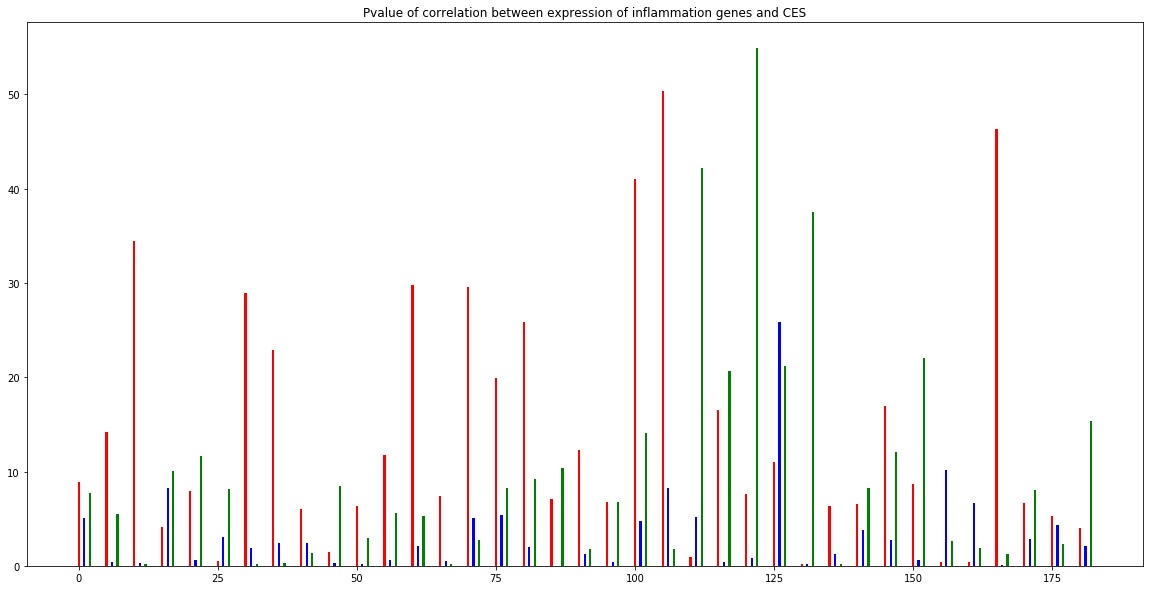

In [115]:
colors=['r','b','g']
plt.figure(figsize=(20, 10))
for i,g in enumerate(genes):
    for j,c in enumerate(cancers):
        plt.bar(i*5+j,-np.log(float(d.loc[g][j])), width = 0.4, color=colors[j])
plt.title('Pvalue of correlation between expression of inflammation genes and CES')
plt.savefig('pvalue_correlation_for_various_cancers.png')
plt.show()

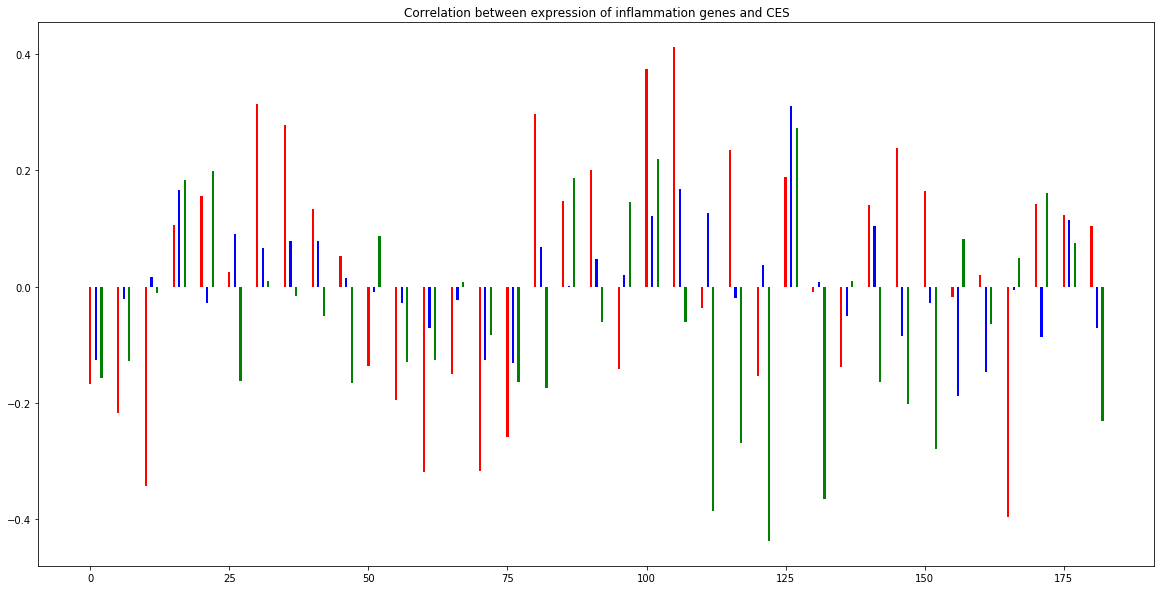

In [116]:
colors=['r','b','g']
plt.figure(figsize=(20, 10))
for i,g in enumerate(genes):
    for j,c in enumerate(cancers):
        plt.bar(i*5+j,float(correl.loc[g][j]), width = 0.4, color=colors[j])
plt.title('Correlation between expression of inflammation genes and CES')
plt.savefig('correlation_for_various_cancers.png')
plt.show()